## What day of the week are people the happiest?

Using the CSV file that contains data on all the courses that the
instructor teaches, the ratings and comments left each day for these course over the span of three years, we will attempt to answer the question mentioned above. The reasoning is that whatever day of the week the average ratings are highest for the course, that is the day that people are feeling more positive. While it is not the best measure out there, it is statistically acceptable given that we have tens of thousands of ratings for the three years combined. 

In [1]:
import pandas
import datetime as datetime
time = datetime.datetime
import pytz 
import matplotlib.pyplot as plt

data = pandas.read_csv('reviews.csv', parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


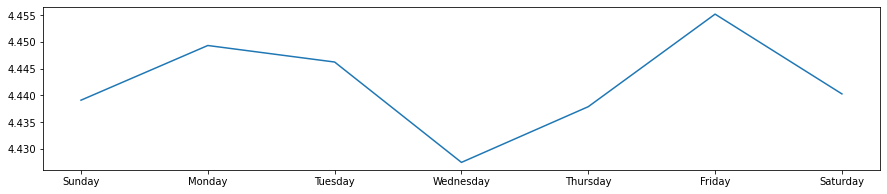

In [10]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

plt.figure(figsize=[15,3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])


### Therefore, Friday is when the course-users are the happiest!